In [100]:
import boto3
import io
import matplotlib
from rekognition_image_detection import RekognitionImage
from rekognition_collections import  RekognitionCollectionManager
from pprint import pprint
from PIL import Image, ImageDraw, ImageFont
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [94]:
rekognition_client = boto3.client('rekognition');
images = [
    RekognitionImage.from_file(
        'Photos/donald_trump.jpg', rekognition_client,
        image_name='Donald_Trump'
    ),
    RekognitionImage.from_file(
        'Photos/Joe_Biden.jpg', rekognition_client,
        image_name='Joe_Biden'
    )
]
test_images = [
    RekognitionImage.from_file(
        'Photos/trump-rittenhouse2-1.jpg', rekognition_client,
        image_name='Test_1'
    ),
    RekognitionImage.from_file(
        'Photos/Biden_Trump.jpg', rekognition_client,
        image_name='Test_2'
    )
]

In [3]:
collection_mgr = RekognitionCollectionManager(rekognition_client)
# rekognition_client.delete_collection(CollectionId='faces_')
collection = collection_mgr.create_collection('faces_')

In [95]:
for image in images:
        collection.index_faces(image, 1)

In [96]:
print("Listing faces in collection:")
faces = collection.list_faces(10)
for face in faces:
    pprint(face.to_dict())

Listing faces in collection:
{'bounding_box': {'Height': 0.6861209869384766,
                  'Left': 0.228426992893219,
                  'Top': 0.22732199728488922,
                  'Width': 0.5428990125656128},
 'external_image_id': 'Donald_Trump',
 'face_id': '8a87aec4-5d40-4d3e-a503-0069275e3986',
 'image_id': 'e5532ff4-c87a-3d18-aa8d-306cdaedcb71'}
{'bounding_box': {'Height': 0.33695200085639954,
                  'Left': 0.34863799810409546,
                  'Top': 0.15870699286460876,
                  'Width': 0.2971070110797882},
 'external_image_id': 'Joe_Biden',
 'face_id': 'c8f80c06-093a-43a8-b6f9-3eb9b1fd0095',
 'image_id': 'b3ebc068-f01c-3987-ade9-c35d87300923'}


In [104]:
def get_matches(collection, image):
    faces_to_search = collection.index_faces(image, 50)[0]
    matches = []
    faces_matched = []
    for face in faces_to_search:
        found = collection.search_faces(face.face_id, threshold=90, max_faces=1)
        if found != []:
            matches.append(found[0].external_image_id)
            faces_matched.append(face)

    collection.delete_faces([face.face_id for face in faces_to_search])
    return matches, faces_matched

In [101]:
def draw_recognized(image, matches, faces):
    boxes = [face.bounding_box for face in faces]
    image_bytes = image['Bytes']
    pil_img = Image.open(io.BytesIO(image_bytes))
    draw = ImageDraw.Draw(pil_img)
    colors = ['red', 'green', 'blue', 'yellow', 'black', 'white']
    for i, box in enumerate(boxes):
        left = pil_img.width * box['Left']
        top = pil_img.height * box['Top']
        right = (pil_img.width * box['Width']) + left
        bottom = (pil_img.height * box['Height']) + top
        draw.rectangle([left, top, right, bottom], outline=colors[i % len(colors)], width=10)
    plt.figure()
    imshow(np.asarray(pil_img))
    for i, match in enumerate(matches):
        print(f"{colors[i % 6]} - {match}")

Searching for faces in the collection that match faces in Test_1.
red - Donald_Trump
Searching for faces in the collection that match faces in Test_2.
red - Donald_Trump
green - Joe_Biden


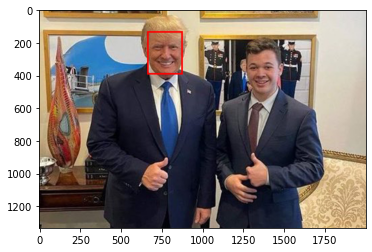

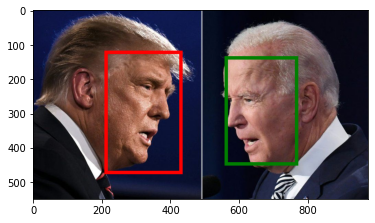

In [105]:
for test_image in test_images:
    print(f"Searching for faces in the collection that match faces in "
          f"{test_image.image_name}.")
    matches, faces_found = get_matches(collection, test_image)
    draw_recognized(test_image.image, matches, faces_found)

In [103]:
print("Listing faces in collection:")
faces = collection.list_faces(10)
for face in faces:
    pprint(face.to_dict())

Listing faces in collection:
{'bounding_box': {'Height': 0.6861209869384766,
                  'Left': 0.228426992893219,
                  'Top': 0.22732199728488922,
                  'Width': 0.5428990125656128},
 'external_image_id': 'Donald_Trump',
 'face_id': '8a87aec4-5d40-4d3e-a503-0069275e3986',
 'image_id': 'e5532ff4-c87a-3d18-aa8d-306cdaedcb71'}
{'bounding_box': {'Height': 0.33695200085639954,
                  'Left': 0.34863799810409546,
                  'Top': 0.15870699286460876,
                  'Width': 0.2971070110797882},
 'external_image_id': 'Joe_Biden',
 'face_id': 'c8f80c06-093a-43a8-b6f9-3eb9b1fd0095',
 'image_id': 'b3ebc068-f01c-3987-ade9-c35d87300923'}


In [107]:
collection.delete_collection()


ParamValidationError: Parameter validation failed:
Invalid type for parameter CollectionId, value: None, type: <class 'NoneType'>, valid types: <class 'str'>